In [1]:
import numpy as np
import sympy
from pprint import pprint

In [2]:
def ptm(U, P_list, d):
    if not isinstance(U, list): 
        U = [U]
    def emap(E, rho):
        e_rho = np.array([[0.0, 0.0], [0.0, 0.0]])
        for E_i in E: 
            erhoe = np.dot(E_i, np.dot(rho, E_i.getH()))
            e_rho = e_rho + erhoe
        return e_rho

    mat = []
    for P_i in P_list:
        row = []
        for P_j in P_list:
            E_ij = 1/2 * np.trace(np.dot(P_i, emap(U, P_j)))
            row.append(E_ij)
        mat.append(row)
    return np.array(mat)


In [3]:
I = np.matrix([[1, 0], [0, 1]])
X = np.matrix([[0, 1], [1, 0]])
Y = np.matrix([[0, 1j], [-1j, 0]])
Z = np.matrix([[1, 0], [0, -1]])

P = [I, X, Y, Z]

d = 2

## Pauli Transfar matrix
https://journals.aps.org/prx/pdf/10.1103/PhysRevX.8.031027 のTable 1 についてPauli transfer matrixを計算


In [4]:
# 1 
U = I
E_I = ptm(U, P, d)
print(E_I)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [5]:
# 2
U = X
E_sigmaX = ptm(U, P, d)
print(E_sigmaX)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


In [6]:
# 3
U = Y
E_sigmaY = ptm(U, P, d)
print(E_sigmaY)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


In [7]:
# 4
U = Z
E_sigmaZ = ptm(U, P, d)
print(E_sigmaZ)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


In [8]:
# 5
U = 1/np.sqrt(2) * (I + 1J*X)
E_Rx = ptm(U, P, d)
print(E_Rx)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]]


In [9]:
# 6
U = 1/np.sqrt(2) * (I + 1J*Y)
E_Ry = ptm(U, P, d)
print(E_Ry)

[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -2.23711432e-17+0.00000000e+00j]
 [-2.23711432e-17+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+2.23711432e-17j
   1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -1.00000000e+00+0.00000000e+00j
   0.00000000e+00+2.23711432e-17j  0.00000000e+00+0.00000000e+00j]]


In [10]:
# 7
U = 1/np.sqrt(2) * (I + 1J*Z)
E_Rz = ptm(U, P, d)
print(E_Rz)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


In [11]:
# 8
U = 1/np.sqrt(2) * (Y + Z)
E_Ryz = ptm(U, P, d)
print(E_Ryz)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]]


In [12]:
# 9
U = 1/np.sqrt(2) * (Z + X)
E_Rzx = ptm(U, P, d)
print(E_Rzx)

[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -2.23711432e-17+0.00000000e+00j]
 [-2.23711432e-17+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00-2.23711432e-17j
  -1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   0.00000000e+00-2.23711432e-17j  0.00000000e+00+0.00000000e+00j]]


In [13]:
# 10
U = 1/np.sqrt(2) * (X + Y)
E_Rxy = ptm(U, P, d)
print(E_Rxy)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


In [14]:
# 11
U = 1/2 * (I + X)
E_PIx = ptm(U, P, d)
print(E_PIx)

[[0.5+0.j 0.5+0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0.5+0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]


In [15]:
# 12
U = 1/2 * (I + Y)
E_PIy = ptm(U, P, d)
print(E_PIy)

[[0.5+0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]


In [16]:
# 13
U = 1/2 * (I + Z)
E_PIz = ptm(U, P, d)
print(E_PIz)

[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


In [17]:
# 14
U = 1/2 * (Y + 1j*Z)
E_PIyz = ptm(U, P, d)
print(E_PIyz)

[[ 0.5+0.j  0.5+0.j  0. +0.j  0. +0.j]
 [-0.5+0.j -0.5+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]]


In [18]:
# 15
U = 1/2 * (Z + 1j*X)
E_PIzx = ptm(U, P, d)
print(E_PIzx)


[[ 0.5+0.j  0. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-0.5+0.j  0. +0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]]


In [19]:
# 16
U = 1/2 * (X + 1j*Y)
E_PIxy = ptm(U, P, d)
print(E_PIxy)

[[ 0.5+0.j  0. +0.j  0. +0.j  0.5+0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]]


In [20]:
# Define set of Basis operation
Basis_op = [E_I, E_sigmaX, E_sigmaY, E_sigmaZ, E_Rx, E_Ry, E_Rz, E_Ryz, E_Rzx, E_Rxy, E_PIx, E_PIy, E_PIz, E_PIyz, E_PIzx, E_PIxy]

## Probabilistic error cancellation

In [21]:
# Define functions

# compose simultaneous equations
def solve_compose_simulequ(q_list, E_inv):
    equ_list = []
    for i in range(4): 
        for j in range(4):
            equ_ij = 0
            for l in range(16):
                equ_ij += q_list[l]*Basis_op[l][i][j]
            equ_list.append(equ_ij - E_inv[i][j])
    print("Simultaneous equations:\n")
    pprint(equ_list)
    
    solutions = sympy.solve(equ_list)
    print("\nSolutions:\n")
    print(solutions)

    return solutions

# cost of QEM (gamma)
def qem_gamma(solutions):
    values = list(solutions.values())
    qem_gamma = 0
    for q_i in values:
        qem_gamma += abs(q_i)
    print("gamma:", qem_gamma)
    return qem_gamma

# Quasi-probability to probability
def quasi_to_prob(q, gamma):
    p = abs(q)/gamma
    print(p)
    return p

def parity(q):
    if q >= 0:
        return 1
    else:
        return -1

### Depolarizing channel

In [22]:
p = 0.05
E_0D = np.sqrt((1 - 3*p/4)) * I
E_1D = np.sqrt(p/4) * X
E_2D = np.sqrt(p/4) * Y
E_3D = np.sqrt(p/4) * Z

U_D = [E_0D, E_1D, E_2D, E_3D]

# calculate Pauli transfar matrix
E_D = ptm(U_D, P, d)
print("Pauli transfar matrix")
print(E_D)

# calculate inverse of PTM
E_D_inv = np.linalg.inv(E_D)
print("\nInverse of Pauli transfar matrix")
print(E_D_inv)

Pauli transfar matrix
[[1.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.95+0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.95+0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.95+0.j]]

Inverse of Pauli transfar matrix
[[1.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 1.05263158+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 1.05263158+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 1.05263158+0.j]]


In [23]:
q_I = sympy.Symbol('q_I')
q_sigmaX = sympy.Symbol('q_sigmaX')
q_sigmaY = sympy.Symbol('q_sigmaY')
q_sigmaZ = sympy.Symbol('q_sigmaZ')
q_Rx = sympy.Symbol('q_Rx')
q_Ry = sympy.Symbol('q_Ry')
q_Rz = sympy.Symbol('q_Rz')
q_Ryz = sympy.Symbol('q_Ryz')
q_Rzx = sympy.Symbol('q_Rzx')
q_Rxy = sympy.Symbol('q_Rxy')
q_PIx = sympy.Symbol('q_PIx')
q_PIy = sympy.Symbol('q_PIy')
q_PIz = sympy.Symbol('q_PIz')
q_PIyz = sympy.Symbol('q_PIyz')
q_PIzx = sympy.Symbol('q_PIzx')
q_PIxy = sympy.Symbol('q_PIxy')

q_list = [q_I, q_sigmaX, q_sigmaY, q_sigmaZ, q_Rx, q_Ry, q_Rz, q_Ryz, q_Rzx, q_Rxy, q_PIx, q_PIy, q_PIz, q_PIyz, q_PIzx, q_PIxy]

solutions_D = solve_compose_simulequ(q_list, E_D_inv)

Simultaneous equations:

[1.0*q_I + 0.5*q_PIx + 0.5*q_PIxy + 0.5*q_PIy + 0.5*q_PIyz + 0.5*q_PIz + 0.5*q_PIzx + 1.0*q_Rx + 1.0*q_Rxy + 1.0*q_Ry + 1.0*q_Ryz + 1.0*q_Rz + 1.0*q_Rzx + 1.0*q_sigmaX + 1.0*q_sigmaY + 1.0*q_sigmaZ - 1.0,
 0.5*q_PIx + 0.5*q_PIyz,
 0.5*q_PIy + 0.5*q_PIzx,
 0.5*q_PIxy + 0.5*q_PIz - 2.23711431707574e-17*q_Ry - 2.23711431707574e-17*q_Rzx,
 0.5*q_PIx - 0.5*q_PIyz - 2.23711431707574e-17*q_Ry - 2.23711431707574e-17*q_Rzx,
 1.0*q_I + 0.5*q_PIx - 0.5*q_PIyz + 1.0*q_Rx - 1.0*q_Ryz + 1.0*q_sigmaX - 1.0*q_sigmaY - 1.0*q_sigmaZ - 1.05263157894737,
 1.0*q_Rxy - 1.0*q_Rz,
 1.0*q_Ry + 1.0*q_Rzx,
 0.5*q_PIy - 0.5*q_PIzx,
 1.0*q_Rxy + 2.23711431707574e-17*I*q_Ry + 1.0*q_Rz - 2.23711431707574e-17*I*q_Rzx,
 1.0*q_I + 0.5*q_PIy - 0.5*q_PIzx + 1.0*q_Ry - 1.0*q_Rzx - 1.0*q_sigmaX + 1.0*q_sigmaY - 1.0*q_sigmaZ - 1.05263157894737,
 -1.0*q_Rx + 1.0*q_Ryz,
 -0.5*q_PIxy + 0.5*q_PIz,
 -1.0*q_Ry + 1.0*q_Rzx,
 1.0*q_Rx + 2.23711431707574e-17*I*q_Ry + 1.0*q_Ryz - 2.23711431707574e-17*I*q_Rzx,

In [24]:
gamma_D = qem_gamma(solutions_D)
P_I = quasi_to_prob(solutions_D[q_I], gamma_D)
P_sigmaX = quasi_to_prob(solutions_D[q_sigmaX], gamma_D)
P_sigmaY = quasi_to_prob(solutions_D[q_sigmaY], gamma_D)
P_sigmaZ = quasi_to_prob(solutions_D[q_sigmaZ], gamma_D)

gamma: 1.07894736842105
0.963414634146342
0.0121951219512195
0.0121951219512195
0.0121951219512195


## Simulation on Qiskit

In [25]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit.compiler import transpile, assemble
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.quantum_info.states import DensityMatrix
from qiskit.quantum_info.operators import Operator

from math import pi
from random import random

import time
from multiprocessing import Process
from multiprocessing import Manager
from multiprocessing import Pool

In [26]:
Ntrial = 100

In [27]:
# compose single qubit quantum circuit

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

circuit_depth = 11

for _ in range(circuit_depth):
    qc.x(qr[0])
    qc.barrier()
qc.measure(qr, cr)
qc = transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx'])
print(qc)

      ┌───────────┐ ░ ┌───────────┐ ░ ┌───────────┐ ░ ┌───────────┐ ░ »
q0_0: ┤ U3(π,0,π) ├─░─┤ U3(π,0,π) ├─░─┤ U3(π,0,π) ├─░─┤ U3(π,0,π) ├─░─»
      └───────────┘ ░ └───────────┘ ░ └───────────┘ ░ └───────────┘ ░ »
c0: 1/════════════════════════════════════════════════════════════════»
                                                                      »
«      ┌───────────┐ ░ ┌───────────┐ ░ ┌───────────┐ ░ ┌───────────┐ ░ »
«q0_0: ┤ U3(π,0,π) ├─░─┤ U3(π,0,π) ├─░─┤ U3(π,0,π) ├─░─┤ U3(π,0,π) ├─░─»
«      └───────────┘ ░ └───────────┘ ░ └───────────┘ ░ └───────────┘ ░ »
«c0: 1/════════════════════════════════════════════════════════════════»
«                                                                      »
«      ┌───────────┐ ░ ┌───────────┐ ░ ┌───────────┐ ░ ┌─┐
«q0_0: ┤ U3(π,0,π) ├─░─┤ U3(π,0,π) ├─░─┤ U3(π,0,π) ├─░─┤M├
«      └───────────┘ ░ └───────────┘ ░ └───────────┘ ░ └╥┘
«c0: 1/═════════════════════════════════════════════════╩═
«                                      

In [28]:
# compose depolarizing error circuit

depol_circs = []

def depolarizing(circuit, qreg):
    
    # Monte Carlo method
    r = random()
    if r<(1-3*p/4):
        circuit.id(qreg)
    elif r>=(1-3*p/4) and r<(1-3*p/4)+p/4:
        circuit.x(qreg)
    elif r>=(1-3*p/4)+p/4 and r<(1-3*p/4)+p/4+p/4:
        circuit.y(qreg)
    elif r>=(1-3*p/4)+p/4+p/4:
        circuit.z(qreg)

def compose_depolarizing_circuit(depth):
    qr_depol = QuantumRegister(1)
    cr_depol = ClassicalRegister(1)
    qc_depol = QuantumCircuit(qr_depol, cr_depol)

    parity = 1
    for _ in range(depth):
        qc_depol.x(qr_depol[0])
        depolarizing(qc_depol, qr_depol[0])
        qc.barrier()

    qc_depol.measure(qr_depol, cr_depol)
    
    return qc_depol

In [29]:
# start = time.time()
# depol_circs = []
# for _ in range(Ntrial):
#     depol_circs.append(compose_depolarizing_circuit(circuit_depth))
# print('time: ', time.time() - start)

In [30]:
# # show the example circuit and its parity
# print(depol_circs[4])

In [31]:
# compose probabilistic error cancellation circuit

def recover(circuit, qreg, parity):
    
    # Monte Carlo method
    r = random()
    if r<P_I:
        circuit.id(qreg)
    elif r>=P_I and r<P_I+P_sigmaX:
        circuit.x(qreg)
        parity *= -1
    elif r>=P_I+P_sigmaX and r<P_I+P_sigmaX+P_sigmaY:
        circuit.y(qreg)
        parity *= -1
    elif r>=P_I+P_sigmaX+P_sigmaY:
        circuit.z(qreg)
        parity *= -1
    return parity

def compose_pec_circuit(depth):
    qr_pec = QuantumRegister(1)
    cr_pec = ClassicalRegister(1)
    qc_pec = QuantumCircuit(qr_pec, cr_pec)

    parity = 1
    for _ in range(depth):
        qc_pec.x(qr_pec[0])
        depolarizing(qc_pec, qr_pec[0])
        parity = recover(qc_pec, qr_pec[0], parity)
        qc.barrier()

    qc_pec.measure(qr_pec, cr_pec)
    return qc_pec, parity

In [32]:
# start = time.time()
# pec_circs = []
# for _ in range(Ntrial):
#     qc_pec, parity = compose_pec_circuit(circuit_depth)
#     pec_circs.append((qc_pec, parity))
# print('time: ', time.time() - start)

In [33]:
# # show the example circuit and its parity
# pec_circs[1][0].draw(output='mpl')

In [34]:
# # build a noise model

# nm_D = NoiseModel()
# basis_gates = ['u1', 'u2', 'u3']

# # add depolarizing error to all single qubit
# error = depolarizing_error(p, 1)
# nm_D.add_all_qubit_quantum_error(error, basis_gates)

# # show the noise model
# print(nm_D)

### Execute on simulator

In [35]:
# number of data points
T = 1000

# define backend simulator
simulator = Aer.get_backend('qasm_simulator')

In [36]:
def expectation_value(dist):
    gra_pop = dist.get('0', 0)
    exc_pop = dist.get('1', 0)
    return (gra_pop*1 + exc_pop*(-1)) / (gra_pop+exc_pop)



In [37]:
def execute_noiseless(qcircuit):  
    qobj = assemble(qcircuit)
    job = simulator.run(qobj, shots=10000)
    counts_noiseless= job.result().get_counts()
    e = expectation_value(counts_noiseless)
    print("Expectation Value: ", e)
    return e

def execute_noisy(backend, depth, trial):
    # compose circuit list
    depol_circs = []
    for _ in range(trial):
        depol_circs.append(compose_depolarizing_circuit(depth))
    
    # execute
    counts = {'0': 0, '1': 0}
    for qc in depol_circs:
        qobj = assemble(qc)
        job = backend.run(qobj, shots=1)
        _counts= job.result().get_counts()
        counts['0'] += _counts.get('0', 0)
        counts['1'] += _counts.get('1', 0)
    
    e = expectation_value(counts)
    print("Expectation Value: ", e)
    return e


def execute_pec(backend, depth, trial, gamma):
    
    # compose pec circuit list
    pec_circs = []
    for _ in range(trial):
        qc_pec, parity = compose_pec_circuit(depth)
        pec_circs.append((qc_pec, parity))
    
    # execute 
    counts = {'0': 0, '1': 0}
    for qc, parity in pec_circs:
        qobj = assemble(qc)
        job = backend.run(qobj, shots=1)
        _counts= job.result().get_counts()
        if parity==1:
            counts['0'] += _counts.get('0', 0)
            counts['1'] += _counts.get('1', 0)
        else:
            counts['0'] += _counts.get('1', 0)
            counts['1'] += _counts.get('0', 0)
    gamma_tot = gamma**depth
    e = expectation_value(counts) * gamma_tot
    print("Expectation Value: ", e)
    
    return float(e)

In [38]:
# e_noiseless = []
# for _ in range(T):
#     _e = execute_noiseless()
#     e_noiseless.append(_e)

# 時間短縮のために
e_noiseless = [-1.0 for _ in range(T)]

In [39]:
# execute noisy circuit
e_noisy = []
for _ in range(T):
    _e_noisy = execute_noisy(simulator, circuit_depth, Ntrial)
    e_noisy.append(_e_noisy)

Expectation Value:  -0.46
Expectation Value:  -0.54
Expectation Value:  -0.6
Expectation Value:  -0.46
Expectation Value:  -0.5
Expectation Value:  -0.62
Expectation Value:  -0.62
Expectation Value:  -0.56
Expectation Value:  -0.64
Expectation Value:  -0.6
Expectation Value:  -0.56
Expectation Value:  -0.6
Expectation Value:  -0.44
Expectation Value:  -0.6
Expectation Value:  -0.58
Expectation Value:  -0.6
Expectation Value:  -0.56
Expectation Value:  -0.6
Expectation Value:  -0.66
Expectation Value:  -0.7
Expectation Value:  -0.4
Expectation Value:  -0.64
Expectation Value:  -0.58
Expectation Value:  -0.62
Expectation Value:  -0.52
Expectation Value:  -0.64
Expectation Value:  -0.48
Expectation Value:  -0.68
Expectation Value:  -0.56
Expectation Value:  -0.64
Expectation Value:  -0.64
Expectation Value:  -0.68
Expectation Value:  -0.58
Expectation Value:  -0.6
Expectation Value:  -0.6
Expectation Value:  -0.52
Expectation Value:  -0.56
Expectation Value:  -0.52
Expectation Value:  -0.

Expectation Value:  -0.5
Expectation Value:  -0.54
Expectation Value:  -0.64
Expectation Value:  -0.56
Expectation Value:  -0.6
Expectation Value:  -0.68
Expectation Value:  -0.46
Expectation Value:  -0.6
Expectation Value:  -0.56
Expectation Value:  -0.68
Expectation Value:  -0.58
Expectation Value:  -0.5
Expectation Value:  -0.58
Expectation Value:  -0.58
Expectation Value:  -0.58
Expectation Value:  -0.62
Expectation Value:  -0.46
Expectation Value:  -0.7
Expectation Value:  -0.68
Expectation Value:  -0.58
Expectation Value:  -0.6
Expectation Value:  -0.68
Expectation Value:  -0.46
Expectation Value:  -0.5
Expectation Value:  -0.54
Expectation Value:  -0.48
Expectation Value:  -0.56
Expectation Value:  -0.56
Expectation Value:  -0.56
Expectation Value:  -0.5
Expectation Value:  -0.6
Expectation Value:  -0.54
Expectation Value:  -0.54
Expectation Value:  -0.58
Expectation Value:  -0.62
Expectation Value:  -0.42
Expectation Value:  -0.72
Expectation Value:  -0.72
Expectation Value:  -

Expectation Value:  -0.5
Expectation Value:  -0.56
Expectation Value:  -0.4
Expectation Value:  -0.64
Expectation Value:  -0.54
Expectation Value:  -0.46
Expectation Value:  -0.72
Expectation Value:  -0.64
Expectation Value:  -0.62
Expectation Value:  -0.6
Expectation Value:  -0.56
Expectation Value:  -0.5
Expectation Value:  -0.52
Expectation Value:  -0.52
Expectation Value:  -0.46
Expectation Value:  -0.66
Expectation Value:  -0.54
Expectation Value:  -0.4
Expectation Value:  -0.4
Expectation Value:  -0.52
Expectation Value:  -0.4
Expectation Value:  -0.58
Expectation Value:  -0.58
Expectation Value:  -0.56
Expectation Value:  -0.54
Expectation Value:  -0.58
Expectation Value:  -0.66
Expectation Value:  -0.5
Expectation Value:  -0.56
Expectation Value:  -0.44
Expectation Value:  -0.44
Expectation Value:  -0.62
Expectation Value:  -0.46
Expectation Value:  -0.48
Expectation Value:  -0.64
Expectation Value:  -0.44
Expectation Value:  -0.56
Expectation Value:  -0.52
Expectation Value:  

Expectation Value:  -0.58
Expectation Value:  -0.48
Expectation Value:  -0.46
Expectation Value:  -0.56
Expectation Value:  -0.46
Expectation Value:  -0.54
Expectation Value:  -0.6
Expectation Value:  -0.62
Expectation Value:  -0.54
Expectation Value:  -0.48
Expectation Value:  -0.6
Expectation Value:  -0.54
Expectation Value:  -0.54
Expectation Value:  -0.6
Expectation Value:  -0.4
Expectation Value:  -0.62
Expectation Value:  -0.54
Expectation Value:  -0.42
Expectation Value:  -0.6
Expectation Value:  -0.66
Expectation Value:  -0.48
Expectation Value:  -0.52
Expectation Value:  -0.5
Expectation Value:  -0.58
Expectation Value:  -0.52
Expectation Value:  -0.58
Expectation Value:  -0.42
Expectation Value:  -0.54
Expectation Value:  -0.66
Expectation Value:  -0.58
Expectation Value:  -0.7
Expectation Value:  -0.68
Expectation Value:  -0.42
Expectation Value:  -0.42
Expectation Value:  -0.56
Expectation Value:  -0.58
Expectation Value:  -0.42
Expectation Value:  -0.64
Expectation Value: 

## Probabilistic Error cancellation

In [40]:
e_pec = []
for _ in range(T):
    _e_pec = execute_pec(simulator, circuit_depth, Ntrial, gamma_D) 
    e_pec.append(_e_pec)

Expectation Value:  -0.784299211111243
Expectation Value:  -0.830434458823669
Expectation Value:  -0.784299211111243
Expectation Value:  -0.922704954248521
Expectation Value:  -1.38405743137278
Expectation Value:  -0.738163963398817
Expectation Value:  -0.876569706536095
Expectation Value:  -1.15338119281065
Expectation Value:  -1.24565168823550
Expectation Value:  -0.922704954248521
Expectation Value:  -1.06111069738580
Expectation Value:  -0.738163963398817
Expectation Value:  -0.876569706536095
Expectation Value:  -1.29178693594793
Expectation Value:  -0.830434458823669
Expectation Value:  -1.15338119281065
Expectation Value:  -0.922704954248521
Expectation Value:  -0.784299211111243
Expectation Value:  -0.738163963398817
Expectation Value:  -1.10724594509823
Expectation Value:  -0.784299211111243
Expectation Value:  -1.33792218366036
Expectation Value:  -0.968840201960947
Expectation Value:  -0.876569706536095
Expectation Value:  -0.507487724836687
Expectation Value:  -0.6458934679

Expectation Value:  -1.19951644052308
Expectation Value:  -1.01497544967337
Expectation Value:  -1.24565168823550
Expectation Value:  -0.784299211111243
Expectation Value:  -0.876569706536095
Expectation Value:  -0.876569706536095
Expectation Value:  -1.29178693594793
Expectation Value:  -1.10724594509823
Expectation Value:  -1.29178693594793
Expectation Value:  -1.06111069738580
Expectation Value:  -0.876569706536095
Expectation Value:  -1.01497544967337
Expectation Value:  -0.968840201960947
Expectation Value:  -0.876569706536095
Expectation Value:  -1.38405743137278
Expectation Value:  -0.968840201960947
Expectation Value:  -0.645893467973965
Expectation Value:  -0.876569706536095
Expectation Value:  -0.876569706536095
Expectation Value:  -1.06111069738580
Expectation Value:  -0.968840201960947
Expectation Value:  -0.692028715686391
Expectation Value:  -0.968840201960947
Expectation Value:  -0.830434458823669
Expectation Value:  -1.15338119281065
Expectation Value:  -0.9227049542485

Expectation Value:  -0.599758220261539
Expectation Value:  -1.01497544967337
Expectation Value:  -1.01497544967337
Expectation Value:  -0.645893467973965
Expectation Value:  -1.10724594509823
Expectation Value:  -0.968840201960947
Expectation Value:  -1.19951644052308
Expectation Value:  -1.10724594509823
Expectation Value:  -0.784299211111243
Expectation Value:  -1.10724594509823
Expectation Value:  -1.19951644052308
Expectation Value:  -0.415217229411834
Expectation Value:  -0.876569706536095
Expectation Value:  -1.01497544967337
Expectation Value:  -1.19951644052308
Expectation Value:  -1.06111069738580
Expectation Value:  -0.830434458823669
Expectation Value:  -1.19951644052308
Expectation Value:  -1.06111069738580
Expectation Value:  -1.10724594509823
Expectation Value:  -1.29178693594793
Expectation Value:  -1.19951644052308
Expectation Value:  -0.922704954248521
Expectation Value:  -0.738163963398817
Expectation Value:  -1.19951644052308
Expectation Value:  -1.38405743137278
Exp

Expectation Value:  -0.830434458823669
Expectation Value:  -1.19951644052308
Expectation Value:  -0.830434458823669
Expectation Value:  -1.10724594509823
Expectation Value:  -1.29178693594793
Expectation Value:  -1.15338119281065
Expectation Value:  -1.10724594509823
Expectation Value:  -1.01497544967337
Expectation Value:  -0.784299211111243
Expectation Value:  -0.830434458823669
Expectation Value:  -1.24565168823550
Expectation Value:  -0.692028715686391
Expectation Value:  -0.876569706536095
Expectation Value:  -1.15338119281065
Expectation Value:  -0.968840201960947
Expectation Value:  -0.922704954248521
Expectation Value:  -1.06111069738580
Expectation Value:  -0.876569706536095
Expectation Value:  -1.15338119281065
Expectation Value:  -0.876569706536095
Expectation Value:  -0.922704954248521
Expectation Value:  -1.15338119281065
Expectation Value:  -1.06111069738580
Expectation Value:  -0.830434458823669
Expectation Value:  -0.784299211111243
Expectation Value:  -0.78429921111124

Expectation Value:  -1.47632792679763
Expectation Value:  -0.784299211111243
Expectation Value:  -0.922704954248521
Expectation Value:  -1.01497544967337
Expectation Value:  -1.24565168823550
Expectation Value:  -1.33792218366036
Expectation Value:  -1.10724594509823
Expectation Value:  -1.01497544967337
Expectation Value:  -1.15338119281065
Expectation Value:  -0.876569706536095
Expectation Value:  -0.968840201960947
Expectation Value:  -1.24565168823550
Expectation Value:  -0.968840201960947
Expectation Value:  -0.692028715686391
Expectation Value:  -1.15338119281065
Expectation Value:  -0.738163963398817
Expectation Value:  -1.19951644052308
Expectation Value:  -1.01497544967337
Expectation Value:  -0.876569706536095
Expectation Value:  -1.10724594509823
Expectation Value:  -1.01497544967337
Expectation Value:  -0.738163963398817
Expectation Value:  -1.10724594509823
Expectation Value:  -0.876569706536095
Expectation Value:  -0.922704954248521
Expectation Value:  -1.15338119281065
E

## Plot result

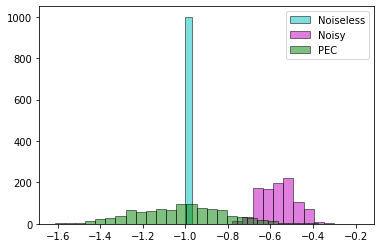

In [54]:
import matplotlib.pyplot as plt
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(e_noiseless, color='c', edgecolor='k', alpha=0.5, bins=30, label='Noiseless')
ax.hist(e_noisy, color='m', edgecolor='k', alpha=0.5, bins=10, label="Noisy")
ax.hist(e_pec, color='g', edgecolor='k', alpha=0.5, bins=30, label="PEC")


plt.legend()
plt.show()